# NBA MVP Prediction

## Table of Contents
* [Import data/modules](#import-data)
* [Exploratory Data Analysis](#eda)
* [Preprocessing](#preprocessing)
* [Modeling](#modeling)
* [Forecasting 2022 MVP](#forecasting)

## Import data/modules <a class="anchor" id="import-data"></a>


In [159]:
#essentials
import os
import numpy as np
import pandas as pd
import dataframe_image as dfi
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#tools/metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import shap

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#pandas show all columns
pd.set_option('display.max_columns', None)

#%load_ext autoreload
#%autoreload 2
#%run ./__init__

### Read Data

In [190]:
#data_path = os.path.dirname(os.getcwd()) + '/data' + '/master_table.csv'
#master_table = pd.read_csv(data_path)
master_table = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\final_dataset.csv")

In [191]:
master_table.head()

Unnamed: 0_x       Player Name   season           Team  conf_abbr  games  \
0           3.0   chris-clemons-2  2018-19       CAMPBELL  Big South     33   
1           8.0   antoine-davis-2  2018-19  DETROIT MERCY    Horizon     30   
2           9.0   antoine-davis-2  2019-20  DETROIT MERCY    Horizon     30   
3          10.0   antoine-davis-2  2020-21  DETROIT MERCY    Horizon     22   
4          15.0  carsen-edwards-1  2018-19         PURDUE    Big Ten     36   

   games_started  mp_per_g  fg_per_g  fga_per_g fg_pct  fg2_per_g  fg2a_per_g  \
0             33      36.6       9.2       20.6  0.448        5.0         8.8   
1             29      37.4       8.8       21.9    0.4        4.4        10.3   
2             30      36.7       7.9       20.8   0.38        4.5        10.4   
3             22      38.5       8.1       19.1  0.424        4.3         9.0   
4             36      35.4       7.7       19.5  0.394        3.9         9.0   

  fg2_pct  fg3_per_g  fg3a_per_g fg3_pct  ft_per_g  fta_per_g ft_pct  \
0   0.569        4.2        11.8   0.357       7.5        8.6  0.869   
1   0.423        4.4        11.6    0.38       4.2        4.9  0.857   
2   0.437        3.4        10.4   0.324       5.1        5.7  0.901   
3   0.482        3.8        10.1   0.372       4.0        4.4  0.917   
4    0.44        3.8        10.6   0.355       5.1        6.1  0.837   

   orb_per_g  drb_per_g  trb_per_g  ast_per_g  stl_per_g  blk_per_g  \
0        0.8        4.3        5.1        2.8        1.5        0.3   
1        0.7        2.4        3.1        3.6        0.9        0.0   
2        0.3        2.8        3.1        4.5        1.7        0.1   
3        0.2        2.7        2.9        4.8        1.5        0.0   
4        0.4        3.2        3.6        2.9        1.3        0.3   

   tov_per_g  pf_per_g  pts_per_g    sos    mp     fg    fga    fg2   fg2a  \
0        2.5       1.9       30.1  -4.39  1208  304.0  679.0  165.0  290.0   
1        3.3       2.3       26.1  -0.36  1122  263.0  657.0  131.0  310.0   
2        4.5       2.5       24.3  -1.90  1102  237.0  623.0  136.0  311.0   
3        3.3       1.6       24.0  -6.21   846  178.0  420.0   95.0  197.0   
4        3.1       2.0       24.3  11.99  1275  277.0  703.0  142.0  323.0   

  fg2_pct.1    fg3   fg3a     ft    fta   orb    drb  trb    ast   stl   blk  \
0     0.569  139.0  389.0  246.0  283.0  25.0  142.0  167   94.0  49.0  11.0   
1     0.423  132.0  347.0  126.0  147.0  22.0   72.0   94  107.0  28.0   0.0   
2     0.437  101.0  312.0  154.0  171.0   9.0   85.0   94  134.0  52.0   3.0   
3     0.482   83.0  223.0   88.0   96.0   4.0   60.0   64  105.0  32.0   0.0   
4      0.44  135.0  380.0  185.0  221.0  14.0  116.0  130  104.0  48.0  10.0   

     tov    pf    pts  fg_per_min  fga_per_min  fg2_per_min  fg2a_per_min  \
0   84.0  63.0  993.0        10.1         22.5          5.5           9.6   
1   99.0  70.0  784.0         9.4         23.4          4.7          11.1   
2  136.0  75.0  729.0         8.6         22.6          4.9          11.3   
3   72.0  36.0  527.0         8.4         19.9          4.5           9.3   
4  113.0  73.0  874.0         8.7         22.1          4.5          10.1   

   fg3_per_min  fg3a_per_min  ft_per_min  fta_per_min  trb_per_min  \
0          4.6          12.9         8.1          9.4          5.5   
1          4.7          12.4         4.5          5.2          3.4   
2          3.7          11.3         5.6          6.2          3.4   
3          3.9          10.5         4.2          4.5          3.0   
4          4.2          11.9         5.8          6.9          4.1   

   ast_per_min  stl_per_min  blk_per_min  tov_per_min  pf_per_min  \
0          3.1          1.6          0.4          2.8         2.1   
1          3.8          1.0          0.0          3.5         2.5   
2          4.9          1.9          0.1          4.9         2.7   
3          5.0          1.5          0.0          3.4         1.7   
4 

## Exploratory Data Analysis <a class="anchor" id="eda"></a>


In [192]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Columns: 132 entries, Unnamed: 0_x to %Pct.1
dtypes: float64(109), int64(7), object(16)
memory usage: 20.8+ MB


In [193]:
print(len(list(master_table.columns)))
print(len(list(master_table.columns[(master_table. dtypes == 'float64') | (master_table. dtypes == 'int64') ])))
print(len(list(master_table.columns[(master_table. dtypes != 'float64') & (master_table. dtypes != 'int64') ])))

132
116
16


In [194]:
columns_to_use = list(master_table.columns[(master_table. dtypes == 'float64') | (master_table. dtypes == 'int64') ])
print(columns_to_use)

['Unnamed: 0_x', 'games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg2_per_g', 'fg2a_per_g', 'fg3_per_g', 'fg3a_per_g', 'ft_per_g', 'fta_per_g', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 

In [195]:
columns_not_used = list(master_table.columns[(master_table. dtypes != 'float64') & (master_table. dtypes != 'int64') ])
print(columns_not_used)

['Player Name', 'season', 'Team', 'conf_abbr', 'fg_pct', 'fg2_pct', 'fg3_pct', 'ft_pct', 'fg2_pct.1', 'Yr', 'FTM-A', 'Pct', '2PM-A', 'Pct.1', '3PM-A', '%2PM-A']


In [196]:
master_table.describe()

Unnamed: 0_x         games  games_started      mp_per_g      fg_per_g  \
count  19302.000000  20622.000000   20622.000000  20622.000000  20622.000000   
mean   15958.614859     27.200611      14.160848     19.405383      2.431219   
std     9392.175519     15.368119      14.784247      9.312031      1.670722   
min        3.000000      1.000000       0.000000      0.000000      0.000000   
25%     7787.750000     19.000000       1.000000     11.300000      1.000000   
50%    15893.500000     28.000000      10.000000     19.700000      2.100000   
75%    23915.750000     32.000000      26.000000     27.400000      3.500000   
max    36745.000000    172.000000     145.000000     39.400000     10.300000   

          fga_per_g     fg2_per_g    fg2a_per_g     fg3_per_g    fg3a_per_g  \
count  20622.000000  20622.000000  20622.000000  20622.000000  20622.000000   
mean       5.536553      1.726554      3.446407      0.705935      2.091349   
std        3.643642      1.368407      2.579986      0.724754      1.936837   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.500000      0.600000      1.400000      0.100000      0.400000   
50%        4.900000      1.400000      2.800000      0.500000      1.600000   
75%        8.000000      2.500000      5.000000      1.100000      3.300000   
max       22.200000     10.100000     20.500000      4.800000     12.600000   

           ft_per_g     fta_per_g     orb_per_g     drb_per_g     trb_per_g  \
count  20622.000000  20622.000000  20622.000000  20622.000000  20622.000000   
mean       1.241398      1.755635      0.824217      2.275900      3.097789   
std        1.069392      1.400053      0.693961      1.439546      1.979802   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.400000      0.700000      0.300000      1.200000      1.600000   
50%        0.900000      1.400000      0.600000      2.000000      2.700000   
75%        1.800000      2.500000      1.100000      3.100000      4.200000   
max        7.600000      9.400000      5.800000     10.700000     15.100000   

          ast_per_g     stl_per_g     blk_per_g     tov_per_g      pf_per_g  \
count  20622.000000  20622.000000  20622.000000  20622.000000  20622.000000   
mean       1.257094      0.622263      0.316705      1.199893      1.687664   
std        1.157330      0.455108      0.399513      0.765869      0.739054   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.400000      0.300000      0.100000      0.600000      1.100000   
50%        0.900000      0.500000      0.200000      1.100000      1.700000   
75%        1.775000      0.900000      0.400000      1.700000      2.200000   
max       10.100000      3.900000      4.600000      6.000000      4.400000   

          pts_per_g           sos            mp            fg           fga  \
count  20622.000000  20622.000000  20622.000000  20622.000000  20622.000000   
mean       6.804544     -0.302665    425.142615     54.490748    123.237218   
std        4.717787      5.720635    485.357201     70.570790    157.898980   
min        0.000000    -16.950000      0.000000      0.000000      0.000000   
25%        2.900000     -4.730000     33.000000      4.000000     10.000000   
50%        6.000000     -1.510000    284.000000     26.000000     62.000000   
75%        9.900000      4.320000    714.000000     86.000000    195.000000   
max       30.100000     13.890000   4984.000000    728.000000   1843.000000   

                fg2          fg2a           fg3          fg3a            ft  \
count  20622.000000  20622.000000  20622.000000  20622.000000  20622.000000   
mean      38.540670     76.608559     15.950078     46.628659     28.246421   
std       53.456835    103.559312     26.471129     73.088532     41.693540   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      6.000000      0.00

In [197]:

master_table['year'] = master_table['year'].astype(int)
list(master_table['year'].unique())

[2019, 2020, 2021, 2022, 2023]

In [198]:
master_table['prev_year'] = master_table['year']-1
master_table[['Player Name', 'season', 'Team','year', 'prev_year','ows', 'dws']]

Player Name   season           Team  year  prev_year  ows  dws
0          chris-clemons-2  2018-19       CAMPBELL  2019       2018  6.1  1.4
1          antoine-davis-2  2018-19  DETROIT MERCY  2019       2018  3.4 -0.2
2          antoine-davis-2  2019-20  DETROIT MERCY  2020       2019  2.5  0.2
3          antoine-davis-2  2020-21  DETROIT MERCY  2021       2020  3.0  0.3
4         carsen-edwards-1  2018-19         PURDUE  2019       2018  4.0  1.6
...                    ...      ...            ...   ...        ...  ...  ...
20617  shanquan-hemphill-1  2020-21          DRAKE  2021       2020  1.9  1.2
20618  shanquan-hemphill-1  2021-22          DRAKE  2022       2021  1.8  1.3
20619  charles-obannonjr-1  2020-21            TCU  2021       2020  0.8  0.6
20620  charles-obannonjr-1  2021-22            TCU  2022       2021  1.8  1.5
20621  charles-obannonjr-1  2022-23            TCU  2023       2022  1.4  1.4

[20622 rows x 7 columns]

In [199]:
filtered_df = master_table[master_table['games']<40]
df_to_use = filtered_df.dropna()

In [200]:
print (master_table.shape)
print(filtered_df.shape)
print(df_to_use.shape)

(20622, 133)
(19807, 133)
(13761, 133)


In [201]:
merged_df = pd.merge(df_to_use, df_to_use , how = 'inner',
                     left_on = ['Player Name','year'] ,
                     right_on = ['Player Name','prev_year'])

In [202]:
print(merged_df.shape)

(6106, 265)


In [203]:
#master_table = merged_df
merged_df['offense'] = merged_df['%Min_y']*merged_df['ORtg_y']

In [204]:
merged_df[['%Min_y','ORtg_y', 'offense' ]].head(3)

%Min_y  ORtg_y   offense
0    88.6   100.0   8860.00
1    95.6   110.5  10563.80
2    92.4   110.9  10247.16

In [205]:
columns_to_use = list(merged_df.columns[(merged_df. dtypes == 'float64') | (merged_df. dtypes == 'int64') ])
print(columns_to_use)

['Unnamed: 0_x_x', 'games_x', 'games_started_x', 'mp_per_g_x', 'fg_per_g_x', 'fga_per_g_x', 'fg2_per_g_x', 'fg2a_per_g_x', 'fg3_per_g_x', 'fg3a_per_g_x', 'ft_per_g_x', 'fta_per_g_x', 'orb_per_g_x', 'drb_per_g_x', 'trb_per_g_x', 'ast_per_g_x', 'stl_per_g_x', 'blk_per_g_x', 'tov_per_g_x', 'pf_per_g_x', 'pts_per_g_x', 'sos_x', 'mp_x', 'fg_x', 'fga_x', 'fg2_x', 'fg2a_x', 'fg3_x', 'fg3a_x', 'ft_x', 'fta_x', 'orb_x', 'drb_x', 'trb_x', 'ast_x', 'stl_x', 'blk_x', 'tov_x', 'pf_x', 'pts_x', 'fg_per_min_x', 'fga_per_min_x', 'fg2_per_min_x', 'fg2a_per_min_x', 'fg3_per_min_x', 'fg3a_per_min_x', 'ft_per_min_x', 'fta_per_min_x', 'trb_per_min_x', 'ast_per_min_x', 'stl_per_min_x', 'blk_per_min_x', 'tov_per_min_x', 'pf_per_min_x', 'pts_per_min_x', 'fg_per_poss_x', 'fga_per_poss_x', 'fg2_per_poss_x', 'fg2a_per_poss_x', 'fg3_per_poss_x', 'fg3a_per_poss_x', 'ft_per_poss_x', 'fta_per_poss_x', 'trb_per_poss_x', 'ast_per_poss_x', 'stl_per_poss_x', 'blk_per_poss_x', 'tov_per_poss_x', 'pf_per_poss_x', 'pts_per_

In [206]:
columns = ['Unnamed: 0_x_x', 'games_x', 'games_started_x', 'mp_per_g_x', 'fg_per_g_x', 'fga_per_g_x', 'fg2_per_g_x', 'fg2a_per_g_x', 'fg3_per_g_x', 'fg3a_per_g_x', 'ft_per_g_x', 'fta_per_g_x', 'orb_per_g_x', 'drb_per_g_x', 'trb_per_g_x', 'ast_per_g_x', 'stl_per_g_x', 'blk_per_g_x', 'tov_per_g_x', 'pf_per_g_x', 'pts_per_g_x', 'sos_x', 'mp_x', 'fg_x', 'fga_x', 'fg2_x', 'fg2a_x', 'fg3_x', 'fg3a_x', 'ft_x', 'fta_x', 'orb_x', 'drb_x', 'trb_x', 'ast_x', 'stl_x', 'blk_x', 'tov_x', 'pf_x', 'pts_x', 'fg_per_min_x', 'fga_per_min_x', 'fg2_per_min_x', 'fg2a_per_min_x', 'fg3_per_min_x', 'fg3a_per_min_x', 'ft_per_min_x', 'fta_per_min_x', 'trb_per_min_x', 'ast_per_min_x', 'stl_per_min_x', 'blk_per_min_x', 'tov_per_min_x', 'pf_per_min_x', 'pts_per_min_x', 'fg_per_poss_x', 'fga_per_poss_x', 'fg2_per_poss_x', 'fg2a_per_poss_x', 'fg3_per_poss_x', 'fg3a_per_poss_x', 'ft_per_poss_x', 'fta_per_poss_x', 'trb_per_poss_x', 'ast_per_poss_x', 'stl_per_poss_x', 'blk_per_poss_x', 'tov_per_poss_x', 'pf_per_poss_x', 'pts_per_poss_x', 'off_rtg_x', 'def_rtg_x', 'per_x', 'ts_pct_x', 'efg_pct_x', 'fg3a_per_fga_pct_x', 'fta_per_fga_pct_x', 'pprod_x', 'orb_pct_x', 'drb_pct_x', 'trb_pct_x', 'ast_pct_x', 'stl_pct_x', 'blk_pct_x', 'tov_pct_x', 'usg_pct_x', 'ows_x', 'dws_x', 'ws_x', 'ws_per_40_x', 'obpm_x', 'dbpm_x', 'bpm_x', 'Ht_x', 'Wt_x', 'G_x', 'S_x', '%Min_x', 'ORtg_x', '%Poss_x', '%Shots_x', 'eFG%_x', 'TS%_x', 'OR%_x', 'DR%_x', 'ARate_x', 'TORate_x', 'Blk%_x', 'Stl%_x', 'FC/40_x', 'FD/40_x', 'FTRate_x', 'Pct.2_x', '%Pct_x', '%Pct.1_x', 'Unnamed: 0_x_y', 'games_y', 'games_started_y', 'mp_per_g_y', 'fg_per_g_y', 'fga_per_g_y', 'fg2_per_g_y', 'fg2a_per_g_y', 'fg3_per_g_y', 'fg3a_per_g_y', 'ft_per_g_y', 'fta_per_g_y', 'orb_per_g_y', 'drb_per_g_y', 'trb_per_g_y', 'ast_per_g_y', 'stl_per_g_y', 'blk_per_g_y', 'tov_per_g_y', 'pf_per_g_y', 'pts_per_g_y', 'sos_y', 'mp_y', 'fg_y', 'fga_y', 'fg2_y', 'fg2a_y', 'fg3_y', 'fg3a_y', 'ft_y', 'fta_y', 'orb_y', 'drb_y', 'trb_y', 'ast_y', 'stl_y', 'blk_y', 'tov_y', 'pf_y', 'pts_y', 'fg_per_min_y', 'fga_per_min_y', 'fg2_per_min_y', 'fg2a_per_min_y', 'fg3_per_min_y', 'fg3a_per_min_y', 'ft_per_min_y', 'fta_per_min_y', 'trb_per_min_y', 'ast_per_min_y', 'stl_per_min_y', 'blk_per_min_y', 'tov_per_min_y', 'pf_per_min_y', 'pts_per_min_y', 'fg_per_poss_y', 'fga_per_poss_y', 'fg2_per_poss_y', 'fg2a_per_poss_y', 'fg3_per_poss_y', 'fg3a_per_poss_y', 'ft_per_poss_y', 'fta_per_poss_y', 'trb_per_poss_y', 'ast_per_poss_y', 'stl_per_poss_y', 'blk_per_poss_y', 'tov_per_poss_y', 'pf_per_poss_y', 'pts_per_poss_y', 'off_rtg_y', 'def_rtg_y', 'per_y', 'ts_pct_y', 'efg_pct_y', 'fg3a_per_fga_pct_y', 'fta_per_fga_pct_y', 'pprod_y', 'orb_pct_y', 'drb_pct_y', 'trb_pct_y', 'ast_pct_y', 'stl_pct_y', 'blk_pct_y', 'tov_pct_y', 'usg_pct_y', 'ows_y', 'dws_y', 'ws_y', 'ws_per_40_y', 'obpm_y', 'dbpm_y', 'bpm_y', 'Ht_y', 'Wt_y', 'G_y', 'S_y', '%Min_y', 'ORtg_y', '%Poss_y', '%Shots_y', 'eFG%_y', 'TS%_y', 'OR%_y', 'DR%_y', 'ARate_y', 'TORate_y', 'Blk%_y', 'Stl%_y', 'FC/40_y', 'FD/40_y', 'FTRate_y', 'Pct.2_y', '%Pct_y', '%Pct.1_y', 'offense']

In [207]:
master_table  = merged_df[columns]
print(master_table.shape)

(6106, 231)


In [209]:
#master_table.to_csv('D:\\Github\\Capstone-project\\Data folder\\zain_testing.csv', index = False)

In [208]:
master_table[['%Min_x','ORtg_x', 'offense' ]].head(3)

%Min_x  ORtg_x   offense
0    90.4   107.7   8860.00
1    88.6   100.0  10563.80
2    95.6   110.5  10247.16

### Correlation Matrix

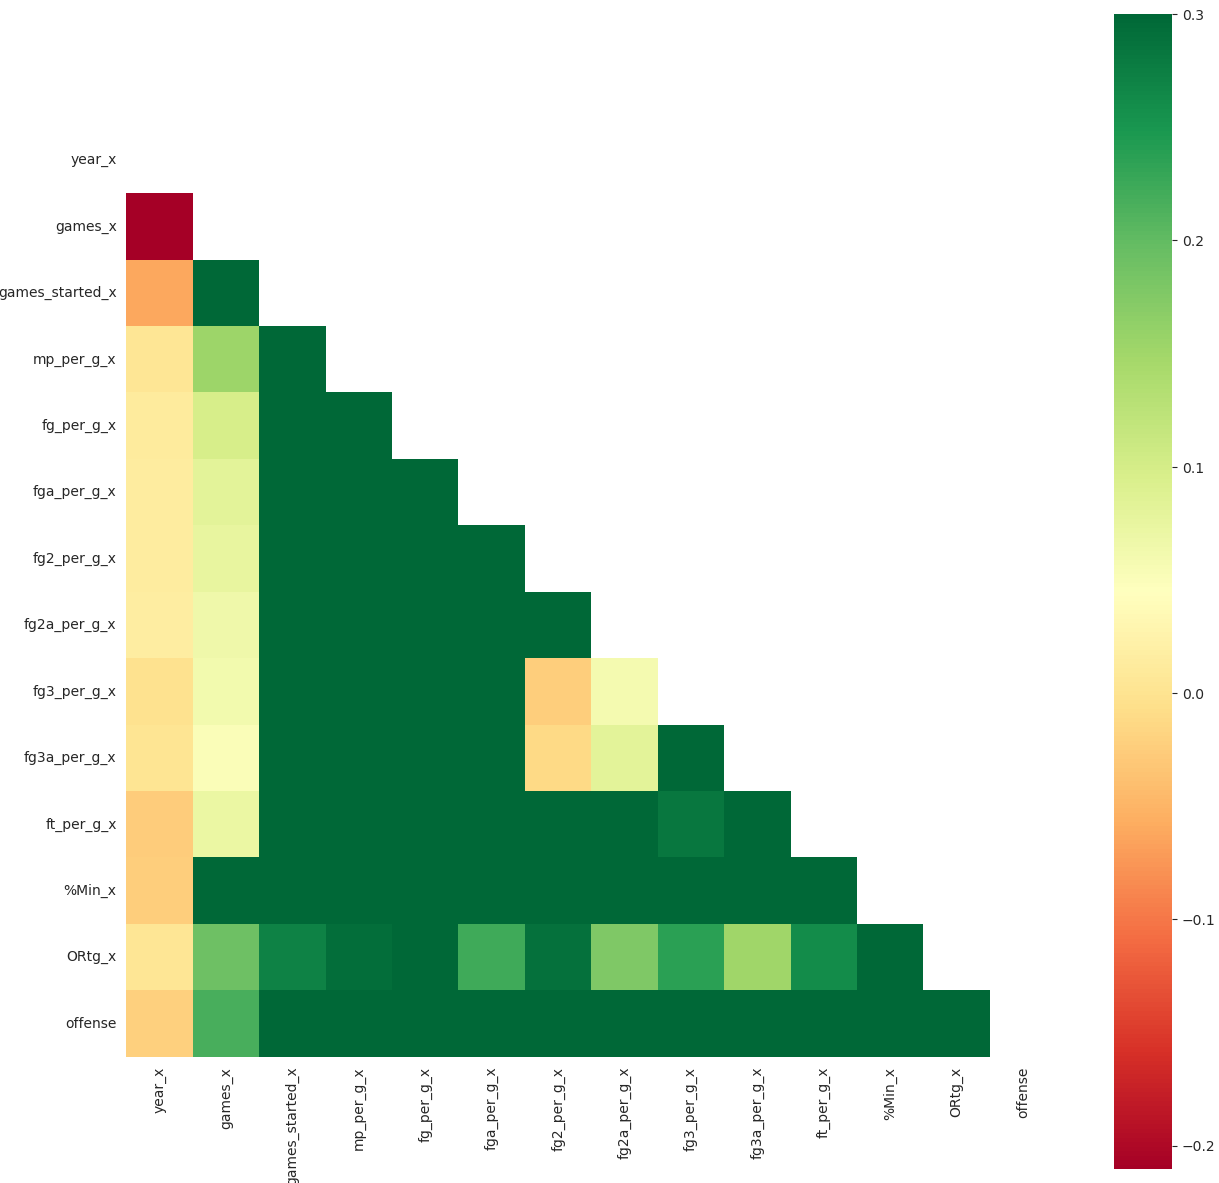

In [179]:
#correlations of each features
corr_matrix = master_table.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")


### Mutual Information

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

* MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
* It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.
* The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.



In [180]:
def calculate_ml_scores(df):
    X = df.copy()
    y = X["offense"]

    X.drop('offense', axis=1, inplace=True)

    # Label encoding for categoricals
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == int
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores

In [181]:
'''
#drop columns for mutual information
to_drop_mi = ['Rank','Player','Age','year','Tm','team','First','Pts Won','Pts Max','WS','WS/48']
master_table_mi = master_table.copy()
master_table_mi.drop(to_drop_mi, axis=1, inplace=True)
'''

"\n#drop columns for mutual information\nto_drop_mi = ['Rank','Player','Age','year','Tm','team','First','Pts Won','Pts Max','WS','WS/48']\nmaster_table_mi = master_table.copy()\nmaster_table_mi.drop(to_drop_mi, axis=1, inplace=True)\n"

In [182]:
X, y, mi_scores = calculate_ml_scores(df=master_table)

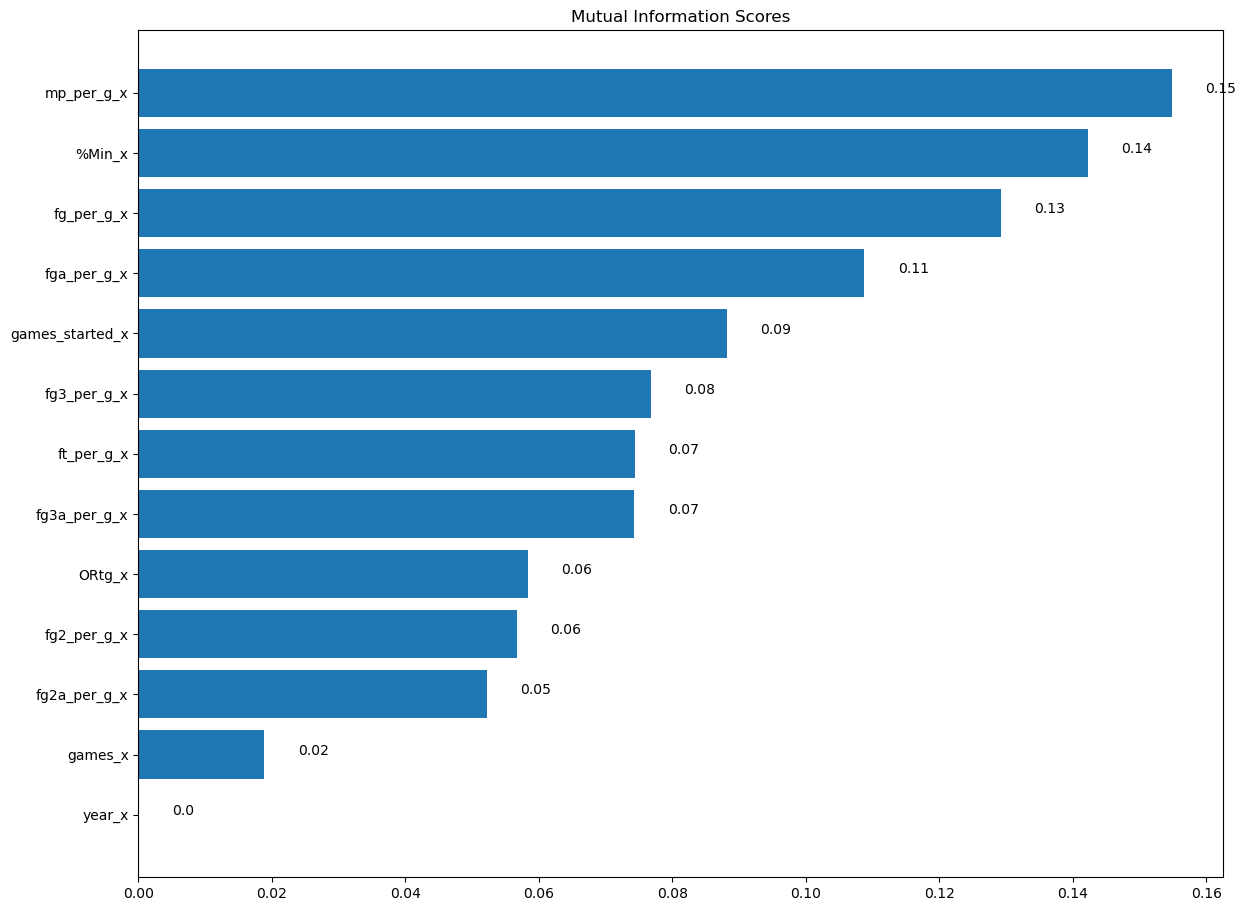

In [110]:
def plot_mi_scores(scores, figsize):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(width, scores)
    
    for index, value in enumerate(scores):
        plt.text(value +0.005 , index, str(round(value,2)))
    
    plt.yticks(width, ticks)    
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores, figsize=(14,11))

### Visualize significant features vs. MVP Shares

In [111]:
def add_win_lose_col(df):
    rank_lst = []
    for i in list(df['Rank']):
        if i == '1':
            rank_lst.append('won')
        else:
            rank_lst.append('lost')
    master_table_rank = df.copy()
    master_table_rank['Win/Lose'] = rank_lst
    return master_table_rank

In [112]:
def show_feature_vs_share(feature, df):
    fig = px.scatter(data_frame = df,
               x=feature,
               y='Share',
               color='Win/Lose',
               color_discrete_sequence=['blue','gray'], 
               hover_data={
                   'Win/Lose': False,
                   'Player': True, 
                   'year': True,
                   'seed': True,
                   'W/L%': True, 
                   'W': True
                   
               })
    fig.update_layout(height=500,
                     title = f"{feature} vs. MVP share")
    fig.show()

In [113]:
'''
features = ['win_shares', 
            'player_efficiency_rating',
            'value_over_replacement_player',
            'box_plus_minus',
            'offensive_box_plus_minus',
            'usage_percentage',
            'seed',
            'W',
            'W/L%',
            'PTS']

master_table_rank = add_win_lose_col(df=master_table)

for feature in features:
    show_feature_vs_share(feature=feature, df=master_table_rank)
'''

"\nfeatures = ['win_shares', \n            'player_efficiency_rating',\n            'value_over_replacement_player',\n            'box_plus_minus',\n            'offensive_box_plus_minus',\n            'usage_percentage',\n            'seed',\n            'W',\n            'W/L%',\n            'PTS']\n\nmaster_table_rank = add_win_lose_col(df=master_table)\n\nfor feature in features:\n    show_feature_vs_share(feature=feature, df=master_table_rank)\n"

At this point these variables may seem to have somewhat linear relationship with the MVP share metric. It could be valid to consider them as model features as the experiments are conducted.

# Preprocessing <a class="anchor" id="preprocessing"></a>

drop unnecessary or redundant features

In [114]:
to_drop = []
'''

#drop columns 

to_drop = [
    'Rank',
    'Player',
    'Age',
    'year',
    'Tm',
    'team',
    'First',
    'Pts Won',
    'Pts Max',
    'WS/48',
    'WS',
    'MP',
    'G',
    'W', 
    'FG%',
    '3P%',
    'STL', 
    'BLK',
    'three_point_attempt_rate',
    'total_rebound_percentage',
    'offensive_rebound_percentage',
    'block_percentage',
    'defensive_rebound_percentage',
    'steal_percentage',
    'turnover_percentage',
    'assist_percentage',
    'AST',
    'TRB',
    #'free_throw_attempt_rate', ######### Experiment
    'FT%',
    'win_shares', 
    #'value_over_replacement_player', 
    'box_plus_minus', 
    #'offensive_box_plus_minus', 
    'defensive_box_plus_minus',
    'offensive_win_shares', 
    'defensive_win_shares', 
    'true_shooting_percentage' 
]
'''


"\n\n#drop columns \n\nto_drop = [\n    'Rank',\n    'Player',\n    'Age',\n    'year',\n    'Tm',\n    'team',\n    'First',\n    'Pts Won',\n    'Pts Max',\n    'WS/48',\n    'WS',\n    'MP',\n    'G',\n    'W', \n    'FG%',\n    '3P%',\n    'STL', \n    'BLK',\n    'three_point_attempt_rate',\n    'total_rebound_percentage',\n    'offensive_rebound_percentage',\n    'block_percentage',\n    'defensive_rebound_percentage',\n    'steal_percentage',\n    'turnover_percentage',\n    'assist_percentage',\n    'AST',\n    'TRB',\n    #'free_throw_attempt_rate', ######### Experiment\n    'FT%',\n    'win_shares', \n    #'value_over_replacement_player', \n    'box_plus_minus', \n    #'offensive_box_plus_minus', \n    'defensive_box_plus_minus',\n    'offensive_win_shares', \n    'defensive_win_shares', \n    'true_shooting_percentage' \n]\n"

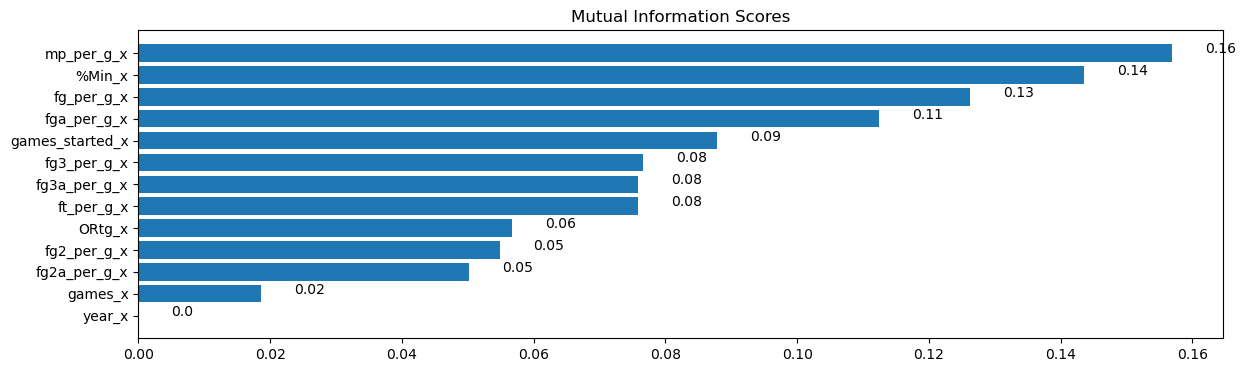

In [115]:
#run another Mutual Information Score analysis
master_table_mi2 = master_table.copy()
master_table_mi2.drop(to_drop, axis=1, inplace=True)
X, y, mi_scores2 = calculate_ml_scores(df=master_table_mi2)
plot_mi_scores(mi_scores2, figsize=(14,4))

## Modeling <a class="anchor" id="modeling"></a>

### Train/Test Split

test on selected year, train on all other years that weren't selected

In [154]:
def train_test_split_by_year(year, df, scaling=False):
    #test year = selected year, train year = other years outside of selected year
    train_df = df[df['year'] != year]
    test_df = df[df['year'] == year]
    
    train_df2 = train_df.copy()
    test_df2 = test_df.copy()
    
    train_df2.drop(to_drop, axis=1, inplace=True)
    test_df2.drop(to_drop, axis=1, inplace=True)
    
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
    
    X_train = train_df2.copy()
    y_train = X_train["offense"]
    
    X_test = test_df2.copy()
    y_test = X_test["offense"]

    X_train.drop('offense', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('offense', axis=1, inplace=True)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test, cols

### Model Helper Functions

train, predict, calculate MAE & R squared, show actual vs. predicted in a dataframe

In [155]:
def run_model(regressor, X_train, y_train, X_test, y_test, df, year):
    model = regressor
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    r2 = r2_score(y_test, predictions)
    
    mvp_race = df[df['year'] == year]
    mvp_race['predicted_offense'] = predictions
    mvp_race = mvp_race.sort_values(["offense", "predicted_offense"], ascending = (False, False))
                                    
    #actual_winner = mvp_race[mvp_race['offense'] == mvp_race['offense'].max()]['Player']
    #predicted_winner = mvp_race[mvp_race['predicted_offense'] == mvp_race['predicted_offense'].max()]['Player']
    return model, mae, r2,  mvp_race #, predicted_winner.iloc[0], actual_winner.iloc[0]

find average metrics and overall accuracy

In [156]:
years = [2019, 2020, 2021, 2022, 2023]
#years = [year for year in range(1980, 2022)]

def run_model_average(df, regressor, scaling=False, print_metrics=False):
    mae_lst = []
    r2_lst = []
    predicted_lst = []
    actual_lst = []
    label_lst =[]
    model_lst = []
    for year in tqdm(years):
        X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year=year, df=df, scaling=False)
        model, mae, r2,  mvp_race = run_model(regressor,
                                                             X_train,
                                                              y_train,
                                                              X_test,
                                                              y_test,
                                                              df=df,
                                                              year=year,
                                                        )
        '''
        if predicted_winner == actual_winner:
            label = 'correct'
        else:
            label = 'incorrect'
        '''
        mae_lst.append(mae)
        r2_lst.append(r2)
        #predicted_lst.append(predicted_winner)
        #actual_lst.append(actual_winner)
        #label_lst.append(label)
        model_lst.append(model)
    d = {
    'year': years,
    'MAE': mae_lst,
    #'R squared': r2_lst,
    #'Predicted MVP': predicted_lst,
    #'Actual MVP': actual_lst,
    #'Label': label_lst
    }

    summary = pd.DataFrame(d)
    #correct_count = summary['Label'].value_counts().iloc[0]
    #incorrect_count = summary['Label'].value_counts().iloc[1]
    #accuracy = correct_count / (correct_count + incorrect_count)
    avg_mae = summary['MAE'].mean()
    avg_r2  = summary['R squared'].mean()
    
    if print_metrics == True:
        print(f"Average MAE: {avg_mae}")
        print(f"Average R squared: {avg_r2}")
        #print(f"Prediction accuracy: {accuracy}")
    return avg_mae, avg_r2, summary, model_lst, cols #, accuracy

### Models
* Linear Regression
* Random Forest Regressor
* XGBoost Regressor
* LightGBM Regressor

(see parameter_tuning.ipynb for parameter tuning scripts)

In [157]:

master_table.rename(columns = {'year_x':'year'}, inplace = True) 
master_table.head(2)

year  games_x  games_started_x  mp_per_g_x  fg_per_g_x  fga_per_g_x  \
0  2019       30               29        37.4         8.8         21.9   
1  2020       30               30        36.7         7.9         20.8   

   fg2_per_g_x  fg2a_per_g_x  fg3_per_g_x  fg3a_per_g_x  ft_per_g_x  %Min_x  \
0          4.4          10.3          4.4          11.6         4.2    90.4   
1          4.5          10.4          3.4          10.4         5.1    88.6   

   ORtg_x  offense  
0   107.7   8860.0  
1   100.0  10563.8

#### Linear Regression

In [158]:
lr_avg_mae, lr_avg_r2, lr_accuracy, lr_summary, lr_models, cols = run_model_average(df=master_table,
                  regressor = LinearRegression(),
                 scaling=True,
                print_metrics=True)

 80%|████████████████████████████████████████████████████████████████████████                  | 4/5 [00:00<00:00, 33.99it/s]


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by LinearRegression.

#### Random Forest Regressor

In [19]:
#display feature importance for tree algorithms (RF, XGB, LGBM
def avg_feature_importance(models, cols):
    lst = []
    for model in models:
        feature_importance = list(model.feature_importances_)
        lst.append(feature_importance)
        
    df = pd.DataFrame(lst, columns=cols)
    mean_features = df.mean()
    
    #df2 = pd.DataFrame([cols ,mean_features], columns=['Feature', 'Feature Importance'])
    df2 = pd.DataFrame([cols ,mean_features]).T
    df2 = df2.rename(columns={0:'Feature', 1:'Score'}).sort_values(by='Score', ascending=False)
    
    #plt.rcParams["figure.figsize"] = (7,4)
    plt.title('Feature Importance Score')
    sns.barplot(x='Score',
                y= 'Feature',
               data=df2,
                  )
    plt.show()

In [20]:
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_models, rf_cols = run_model_average(df=master_table,
                  regressor=RandomForestRegressor(n_estimators = 23, 
                                                  random_state = 0, 
                                                  max_depth=7, 
                                                  min_samples_leaf=1,
                                                  min_samples_split=2),
                print_metrics=True)

100%|██████████| 42/42 [00:02<00:00, 18.09it/s]

Average MAE: 0.10402398323666445
Average R squared: 0.6079918227884213
Prediction accuracy: 0.7380952380952381


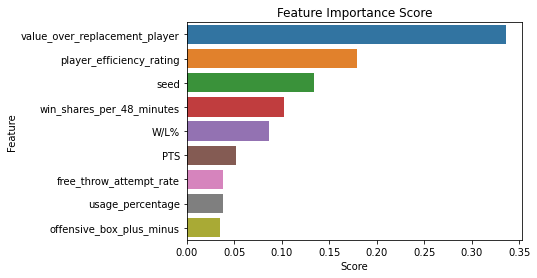

In [21]:
avg_feature_importance(models=rf_models, cols=rf_cols)

#### XGBoost

In [22]:
#BEST MODEL
# 16 5, 0.2745

xgb_avg_mae, xgb_avg_r2, xgb_accuracy, xgb_summary, xgb_models, xgb_cols = run_model_average(df=master_table,
                  regressor = XGBRegressor(n_estimators=16, max_depth=5, learning_rate = 0.2745, subsample=1, colsample_bytree=1),
                 scaling=False, print_metrics=True)

100%|██████████| 42/42 [00:01<00:00, 38.10it/s]

Average MAE: 0.10327332429727709
Average R squared: 0.6062658034118551
Prediction accuracy: 0.8333333333333334


In [23]:
xgb_summary

year       MAE  R squared          Predicted MVP             Actual MVP  \
0   1980  0.068104   0.711039    Kareem Abdul-Jabbar    Kareem Abdul-Jabbar   
1   1981  0.044850   0.605227          Julius Erving          Julius Erving   
2   1982  0.079323   0.264734          Magic Johnson           Moses Malone   
3   1983  0.078697   0.458365           Moses Malone           Moses Malone   
4   1984  0.089311   0.552824             Larry Bird             Larry Bird   
5   1985  0.043589   0.896859             Larry Bird             Larry Bird   
6   1986  0.092436   0.706484             Larry Bird             Larry Bird   
7   1987  0.071820   0.709262          Magic Johnson          Magic Johnson   
8   1988  0.092211   0.652065         Michael Jordan         Michael Jordan   
9   1989  0.064810   0.822390          Magic Johnson          Magic Johnson   
10  1990  0.106758   0.698609          Magic Johnson          Magic Johnson   
11  1991  0.057213   0.890333         Michael Jordan         Michael Jordan   
12  1992  0.064177   0.830480         Michael Jordan         Michael Jordan   
13  1993  0.128876   0.593915         Michael Jordan        Charles Barkley   
14  1994  0.084023   0.611711         David Robinson        Hakeem Olajuwon   
15  1995  0.104388   0.645054         David Robinson         David Robinson   
16  1996  0.074146   0.797787         Michael Jordan         Michael Jordan   
17  1997  0.061466   0.861779            Karl Malone            Karl Malone   
18  1998  0.077423   0.705248         Michael Jordan         Michael Jordan   
19  1999  0.107297   0.113073            Karl Malone            Karl Malone   
20  2000  0.069690   0.838889       Shaquille O'Neal       Shaquille O'Neal   
21  2001  0.135485   0.476847       Shaquille O'Neal          Allen Iverson   
22  2002  0.159644   0.177490             Tim Duncan             Tim Duncan   
23  2003  0.142768   0.431836             Tim Duncan             Tim Duncan   
24  2004  0.097097   0.648054          Kevin Garnett          Kevin Garnett   
25  2005  0.181874  -0.113709            Dwyane Wade             Steve Nash   
26  2006  0.192149  -0.010072          Dirk Nowitzki             Steve Nash   
27  2007  0.098590   0.622680          Dirk Nowitzki          Dirk Nowitzki   
28  2008  0.110665   0.622425           LeBron James            Kobe Bryant   
29  2009  0.131786   0.586624           LeBron James           LeBron James   
30  2010  0.124349   0.576489           LeBron James           LeBron James   
31  2011  0.105977   0.688991           Derrick Rose           Derrick Rose   
32  2012  0.119754   0.582999           LeBron James           LeBron James   
33  2013  0.069011   0.848391           LeBron James           LeBron James   
34  2014  0.099713   0.719490           Kevin Durant           Kevin Durant   
35  2015  0.077365   0.861898          Stephen Curry          Stephen Curry   
36  2016  0.123857   0.672600          Stephen Curry          Stephen Curry   
37  2017  0.263471   0.011375      Russell Westbrook      Russell Westbrook   
38  2018  0.080505   0.876323           James Harden           James Harden   
39  2019  0.157135   0.635266  Giannis Antetokounmpo  Giannis Antetokounmpo   
40  2020  0.096595   0.846305  Giannis Antetokounmpo  Giannis Antetokounmpo   
41  2021  0.109079   0.734734           Nikola Jokić           Nikola Jokić   

        Label  
0     correct  
1     correct  
2   incorrect  
3     correct  
4     correct  
5     correct  
6     correct  
7     correct  
8     correct  
9     correct  
10    correct  
11    correct  
12    correct  
13  incorrect  
14  incorrect  
15    correct  
16    correct  
17    correct  
18    correct  
19    correct  
20    correct  
21  incorrect  
22    correct  
23    correct  
24    correct  
25  incorrect  
26  incorrect  
27    correct  
28  incorrect  
29    correct  
30    correct  
31    correct  
32    correct  
33    correct  
34    correct  
35    correct  
36    correct 

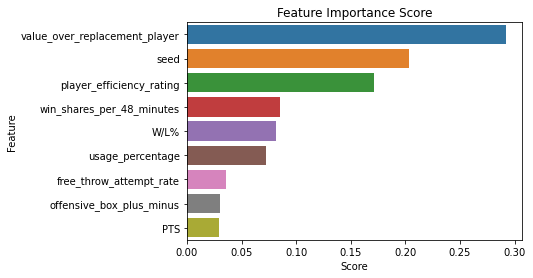

In [24]:
avg_feature_importance(models=xgb_models, cols=xgb_cols)

In [25]:
xgb_summary

year       MAE  R squared          Predicted MVP             Actual MVP  \
0   1980  0.068104   0.711039    Kareem Abdul-Jabbar    Kareem Abdul-Jabbar   
1   1981  0.044850   0.605227          Julius Erving          Julius Erving   
2   1982  0.079323   0.264734          Magic Johnson           Moses Malone   
3   1983  0.078697   0.458365           Moses Malone           Moses Malone   
4   1984  0.089311   0.552824             Larry Bird             Larry Bird   
5   1985  0.043589   0.896859             Larry Bird             Larry Bird   
6   1986  0.092436   0.706484             Larry Bird             Larry Bird   
7   1987  0.071820   0.709262          Magic Johnson          Magic Johnson   
8   1988  0.092211   0.652065         Michael Jordan         Michael Jordan   
9   1989  0.064810   0.822390          Magic Johnson          Magic Johnson   
10  1990  0.106758   0.698609          Magic Johnson          Magic Johnson   
11  1991  0.057213   0.890333         Michael Jordan         Michael Jordan   
12  1992  0.064177   0.830480         Michael Jordan         Michael Jordan   
13  1993  0.128876   0.593915         Michael Jordan        Charles Barkley   
14  1994  0.084023   0.611711         David Robinson        Hakeem Olajuwon   
15  1995  0.104388   0.645054         David Robinson         David Robinson   
16  1996  0.074146   0.797787         Michael Jordan         Michael Jordan   
17  1997  0.061466   0.861779            Karl Malone            Karl Malone   
18  1998  0.077423   0.705248         Michael Jordan         Michael Jordan   
19  1999  0.107297   0.113073            Karl Malone            Karl Malone   
20  2000  0.069690   0.838889       Shaquille O'Neal       Shaquille O'Neal   
21  2001  0.135485   0.476847       Shaquille O'Neal          Allen Iverson   
22  2002  0.159644   0.177490             Tim Duncan             Tim Duncan   
23  2003  0.142768   0.431836             Tim Duncan             Tim Duncan   
24  2004  0.097097   0.648054          Kevin Garnett          Kevin Garnett   
25  2005  0.181874  -0.113709            Dwyane Wade             Steve Nash   
26  2006  0.192149  -0.010072          Dirk Nowitzki             Steve Nash   
27  2007  0.098590   0.622680          Dirk Nowitzki          Dirk Nowitzki   
28  2008  0.110665   0.622425           LeBron James            Kobe Bryant   
29  2009  0.131786   0.586624           LeBron James           LeBron James   
30  2010  0.124349   0.576489           LeBron James           LeBron James   
31  2011  0.105977   0.688991           Derrick Rose           Derrick Rose   
32  2012  0.119754   0.582999           LeBron James           LeBron James   
33  2013  0.069011   0.848391           LeBron James           LeBron James   
34  2014  0.099713   0.719490           Kevin Durant           Kevin Durant   
35  2015  0.077365   0.861898          Stephen Curry          Stephen Curry   
36  2016  0.123857   0.672600          Stephen Curry          Stephen Curry   
37  2017  0.263471   0.011375      Russell Westbrook      Russell Westbrook   
38  2018  0.080505   0.876323           James Harden           James Harden   
39  2019  0.157135   0.635266  Giannis Antetokounmpo  Giannis Antetokounmpo   
40  2020  0.096595   0.846305  Giannis Antetokounmpo  Giannis Antetokounmpo   
41  2021  0.109079   0.734734           Nikola Jokić           Nikola Jokić   

        Label  
0     correct  
1     correct  
2   incorrect  
3     correct  
4     correct  
5     correct  
6     correct  
7     correct  
8     correct  
9     correct  
10    correct  
11    correct  
12    correct  
13  incorrect  
14  incorrect  
15    correct  
16    correct  
17    correct  
18    correct  
19    correct  
20    correct  
21  incorrect  
22    correct  
23    correct  
24    correct  
25  incorrect  
26  incorrect  
27    correct  
28  incorrect  
29    correct  
30    correct  
31    correct  
32    correct  
33    correct  
34    correct  
35    correct  
36    correct 

In [26]:
#export as image
dfi.export(xgb_summary,'xgboost_summary.png')

#### LightGBM

In [27]:
lgbm_avg_mae, lgbm_avg_r2, lgbm_accuracy, lgbm_summary, lgbm_models, lgbm_cols = run_model_average(df=master_table,
                  regressor = LGBMRegressor(n_estimators=23,
                                            max_depth=4,
                                            learning_rate=0.15,
                                            num_leaves=28,
                                            boosting_type='goss',
                                            random_state = 0,
                                           ),
                 scaling=False, print_metrics=True)


100%|██████████| 42/42 [00:01<00:00, 30.45it/s]

Average MAE: 0.10605503800455611
Average R squared: 0.6119918538779787
Prediction accuracy: 0.7619047619047619


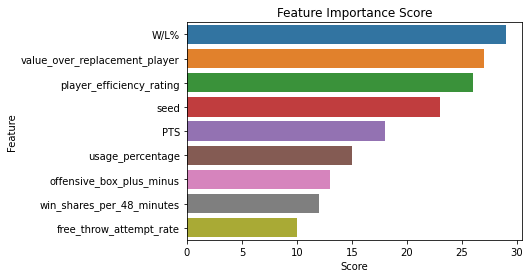

In [28]:
avg_feature_importance(models=lgbm_models, cols=lgbm_cols)

#### Model Summaries

In [29]:
d = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor', 'LGBM Regressor'],
    'average MAE': [lr_avg_mae,rf_avg_mae, xgb_avg_mae, lgbm_avg_mae],
    'average R squared': [lr_avg_r2,rf_avg_r2, xgb_avg_r2, lgbm_avg_r2],
    'accuracy': [lr_accuracy,rf_accuracy, xgb_accuracy, lgbm_accuracy],
}
model_summary_df = pd.DataFrame(d)
model_summary_df.style.highlight_max(subset = ['average R squared', 'accuracy'],
                       color = 'lightgreen', axis = 0)

Best Models: 

In [30]:
#all models in models list have same parameters
best_xgb_model = xgb_models[0]
best_rf_model = rf_models[0]
best_lgbm_model = lgbm_models[0]

### Validate specific year 

The following function can be used to check details on a specific year's MVP race along with its predictions from the model 
* see 'Share' for actual share from the specific year's MVP race
* see 'predicted_share' for model's predicted share

In [31]:
def validate_year(year):
    X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year, df=master_table, scaling=False)
    model, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(best_xgb_model,
                                              X_train, y_train, X_test, y_test, df=master_table, year=year)
    # shift column 'Name' to first position
    nineth_column = mvp_race.pop('predicted_share')
    # first_column) function
    mvp_race.insert(8, 'predicted_share', nineth_column)
    mvp_race = mvp_race.reset_index(drop=True)

    X_test_df = pd.DataFrame(columns=cols, data = X_test)
    
    print(f'Predicted: {predicted_winner}')
    print(f'Actual: {actual_winner}')
    avg_feature_importance(models=[model], cols=cols)
    
    return model, X_test_df, mvp_race #mvp_race.style.highlight_max(subset = ['Share', 'predicted_share'], color = 'lightgreen', axis = 0)

In [32]:
def visualize_shap_values(mvp_race, model):
    top_candidates = list(mvp_race.head(3)['Player'])

    for idx, player in enumerate(top_candidates):
        data_for_prediction = mvp_race[mvp_race['Player'] == player]
        data_for_prediction = data_for_prediction[list(xgb_cols)]
        data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
        rank = idx + 1
        print(f"Rank: {rank}: {player}")

        # Create object that can calculate shap values
        explainer = shap.TreeExplainer(model)
        # Calculate Shap values
        shap_values = explainer.shap_values(data_for_prediction_array)
        shap.initjs()
        display(shap.force_plot(explainer.expected_value, shap_values, data_for_prediction))

Predicted: Derrick Rose
Actual: Derrick Rose


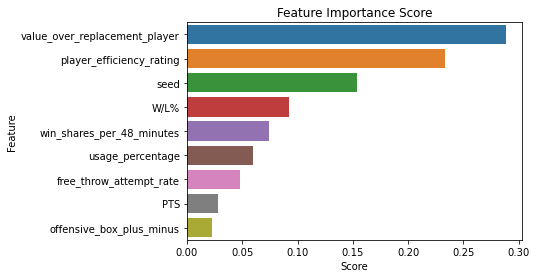

In [33]:
model, X_test_df, mvp_race = validate_year(year=2011)

In [34]:
visualize_shap_values(mvp_race, model)

Rank: 1: Derrick Rose


Rank: 2: Dwight Howard


Rank: 3: LeBron James


## Forecasting 2022 MVP <a class="anchor" id="forecasting"></a>

In [35]:
#data to be forecasted: 2022 mvp candidates from NBA's MVP ladder
data_path_2022 = os.path.dirname(os.getcwd()) + '/data' + '/data_2022.csv'
data_2022 = pd.read_csv(data_path_2022)
data_2022_cleaned = data_2022.copy()
data_2022_cleaned = data_2022_cleaned[list(xgb_cols)]

In [36]:
data_2022

Player  games_played                team        PTS  \
0  Giannis Antetokounmpo            67     milwaukee bucks  29.880597   
1            Joel Embiid            68  philadelphia 76ers  30.573529   
2           Nikola Jokic            74      denver nuggets  27.081081   

        AST       STL       BLK       FG%       3P%        TRB   Tm   W  \
0  5.791045  1.074627  1.358209  0.553414  0.293388  11.611940  MIL  51   
1  4.176471  1.132353  1.455882  0.499250  0.370518  11.705882  PHI  51   
2  7.891892  1.472973  0.851351  0.582761  0.336806  13.770270  DEN  48   

    W/L%  seed  player_efficiency_rating  true_shooting_percentage  \
0  0.622     3                      32.1                     0.633   
1  0.622     4                      31.2                     0.616   
2  0.585     6                      32.8                     0.661   

   three_point_attempt_rate  free_throw_attempt_rate  \
0                     0.194                    0.615   
1                     0.188                    0.602   
2                     0.220                    0.357   

   offensive_rebound_percentage  defensive_rebound_percentage  \
0                           6.6                          30.4   
1                           7.2                          31.1   
2                           9.6                          35.5   

   total_rebound_percentage  assist_percentage  steal_percentage  \
0                      18.7               31.7               1.6   
1                      19.4               23.5               1.7   
2                      23.0               42.6               2.2   

   block_percentage  turnover_percentage  usage_percentage  \
0               4.0                 12.2              34.9   
1               3.9                 11.3              37.2   
2               2.3                 15.6              31.9   

   offensive_win_shares  defensive_win_shares  win_shares  \
0                   9.2                   3.7        12.9   
1                   7.9                   4.1        12.0   
2                  10.8                   4.5        15.2   

   win_shares_per_48_minutes  offensive_box_plus_minus  \
0                      0.281                       7.6   
1                      0.252                       7.2   
2                      0.296                       9.2   

   defensive_box_plus_minus  box_plus_minus  value_over_replacement_player  
0                       3.5            11.2                            7.4  
1                       2.0             9.2                            6.5  
2                       4.5            13.7                            9.8

In [37]:
def prep_train_test(df):
    #train; using hitorical data from 1980 - 2021
    forecast_X_train_df = df.copy()
    forecast_X_train_df.drop(to_drop, axis=1, inplace=True)
    forecast_y_train_df = forecast_X_train_df['Share']
    forecast_X_train_df.drop(['Share'], axis=1, inplace=True)
    
    #data to be forecasted: 2022 mvp candidates from NBA's MVP ladder
    forecast_X_test_df = data_2022_cleaned
    
    print(f'Training dataset columns: \n{list(forecast_X_train_df.columns)} \n')
    print(f'Forecasting dataset columns: \n{list(forecast_X_test_df.columns)}')
    return forecast_X_train_df, forecast_y_train_df, forecast_X_test_df

In [38]:
def fit_forecast_model(regressor):
    model = regressor
    model.fit(forecast_X_train_df, forecast_y_train_df) 
    predictions = model.predict(forecast_X_test_df)
    
    mvp_race_forecast = data_2022.copy()
    mvp_race_forecast['Share Prediction'] = predictions
    mvp_race_forecast = mvp_race_forecast.sort_values(["Share Prediction"], ascending = (False))
    
    mvp_race_forecast_sub = mvp_race_forecast[[
                                                'Player',
                                                'Share Prediction',
                                                'PTS',
                                               'value_over_replacement_player',
                                               'seed',
                                                'W/L%',
                                               'player_efficiency_rating',
                                               'win_shares_per_48_minutes',
                                                'offensive_box_plus_minus',
                                                'usage_percentage',
                                            'free_throw_attempt_rate'
                                              ]].reset_index(drop=True)
    mvp_race_forecast_sub.head()
    avg_feature_importance(models=[model], cols=data_2022_cleaned.columns)
    return model, mvp_race_forecast_sub

In [39]:
def show_highlighted_df(df):
    return df.style.highlight_max(subset = ['value_over_replacement_player',
                                                    'player_efficiency_rating',
                                                    'W/L%',
                                                    'win_shares_per_48_minutes',
                                                    'usage_percentage',
                                                    'free_throw_attempt_rate',
                                                    'offensive_box_plus_minus',
                                                    'PTS',
                                                    'Share Prediction'], color = 'lightgreen', axis = 0)

In [40]:
#train on historical data, predict on 2022 data
forecast_X_train_df, forecast_y_train_df, forecast_X_test_df = prep_train_test(df=master_table)

Training dataset columns: 
['PTS', 'W/L%', 'seed', 'player_efficiency_rating', 'free_throw_attempt_rate', 'usage_percentage', 'win_shares_per_48_minutes', 'offensive_box_plus_minus', 'value_over_replacement_player'] 

Forecasting dataset columns: 
['PTS', 'W/L%', 'seed', 'player_efficiency_rating', 'free_throw_attempt_rate', 'usage_percentage', 'win_shares_per_48_minutes', 'offensive_box_plus_minus', 'value_over_replacement_player']


NOTE: **VORP** (value_over_replacement_player) metric for 2022 candidates has been adjusted as a projection considering the games left in the season. 

### Model 1: XGBoost

In [41]:
best_xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2745, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=16, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

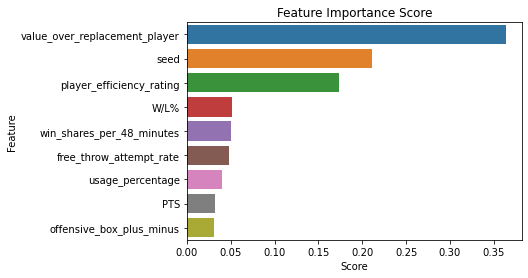

In [42]:
#best xgb model
xgb_model, xgb_mvp_race_forecast = fit_forecast_model(regressor = XGBRegressor(
                                            n_estimators=16,
                                            max_depth=5,
                                            learning_rate=0.2745))

# 16 5, 0.2745



In [43]:
show_highlighted_df(df=xgb_mvp_race_forecast)

In [44]:
visualize_shap_values(model= xgb_model, mvp_race=xgb_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Giannis Antetokounmpo


Rank: 3: Joel Embiid


### Model 2: Random Forest

In [45]:
best_rf_model

RandomForestRegressor(max_depth=7, n_estimators=23, random_state=0)

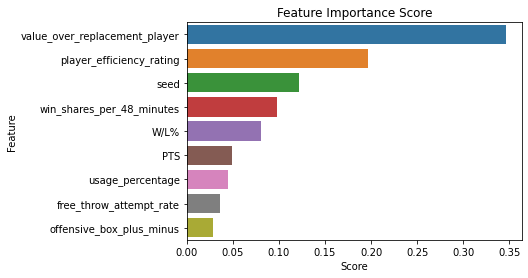

In [46]:
#best random forest model
rf_model, rf_mvp_race_forecast = fit_forecast_model(regressor = RandomForestRegressor(n_estimators = 23, 
                                                  random_state = 0, 
                                                  max_depth=7, 
                                                  min_samples_leaf=1,
                                                  min_samples_split=2)
                  )

In [47]:
show_highlighted_df(df=rf_mvp_race_forecast)

In [48]:
visualize_shap_values(model = rf_model, mvp_race= rf_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Giannis Antetokounmpo


Rank: 3: Joel Embiid


#### Model 3 LightGBM

In [49]:
best_lgbm_model

LGBMRegressor(boosting_type='goss', learning_rate=0.15, max_depth=4,
              n_estimators=23, num_leaves=28, random_state=0)

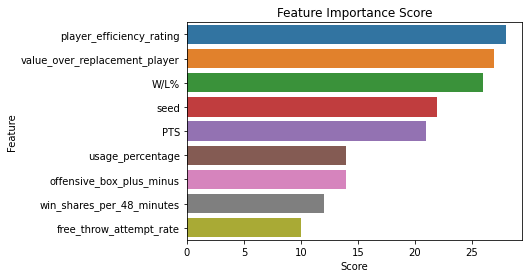

In [50]:
#best LightGBM model
lgbm_model, lgbm_mvp_race_forecast = fit_forecast_model(
                                                regressor = LGBMRegressor(
                                                                    n_estimators=23,
                                                                    max_depth=4,
                                                                    learning_rate=0.15,
                                                                    num_leaves=28,
                                                                    boosting_type='goss',
                                                                    random_state = 0,
                                           ))

In [51]:
show_highlighted_df(df=lgbm_mvp_race_forecast)

In [52]:
visualize_shap_values(model = lgbm_model, mvp_race= lgbm_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Giannis Antetokounmpo


Rank: 3: Joel Embiid


#### MVP Prediction Summary

In [55]:
forecast_tables = [xgb_mvp_race_forecast, lgbm_mvp_race_forecast, rf_mvp_race_forecast]
model_names = ['XGBoost', 'LightGBM', 'Random Forest']

tables = []
for name, forecast_table in zip(model_names, forecast_tables):
    player_sub = forecast_table.head(3)[['Player']]
    player_sub['Rank'] = ['1st Place','2nd Place','3rd Place']
    player_sub2 = player_sub.T.reset_index(drop=True)
    player_sub2.columns = player_sub2.iloc[1]
    player_sub2.drop(player_sub2.tail(1).index,inplace=True)

    share_sub = forecast_table.head(5)[['Share Prediction']]
    share_sub['Rank'] = ['1st Place Share','2nd Place Share','3rd Place Share']
    
    share_sub2 = share_sub.T.reset_index(drop=True)
    share_sub2.columns = share_sub2.iloc[1]
    share_sub2.drop(share_sub2.tail(1).index,inplace=True)

    merged_df = pd.concat([player_sub2, share_sub2], axis=1).sort_index(axis=1)
    merged_df['Model'] = name
    tables.append(merged_df)
    
final_summary_table = pd.concat(tables)
# shift column 'Name' to first position
first_column = final_summary_table.pop('Model')
# first_column) function
final_summary_table.insert(0, 'Model', first_column)

In [56]:
final_summary_table

1          Model     1st Place 1st Place Share              2nd Place  \
0        XGBoost  Nikola Jokic        0.679943  Giannis Antetokounmpo   
0       LightGBM  Nikola Jokic        0.519327  Giannis Antetokounmpo   
0  Random Forest  Nikola Jokic        0.533504  Giannis Antetokounmpo   

1 2nd Place Share    3rd Place 3rd Place Share  
0        0.565778  Joel Embiid        0.425511  
0        0.512879  Joel Embiid        0.329178  
0         0.49226  Joel Embiid        0.405678

In [55]:
#updated 4/15/2022